In [1]:
#Data augmentation.
#A new model is defined for training on augmented images. It includes one additional convned layer
#and a dropout layer
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(256, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))


Metal device set to: Apple M1


2023-02-17 18:59:38.060655: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-17 18:59:38.061290: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [2]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = "/Users/ajdinburnic/Desktop/Master Thesis/Dataset/train"
validation_dir = "/Users/ajdinburnic/Desktop/Master Thesis/Dataset/validation"

#image augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range = 20,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=30,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(256,256),
    batch_size=30,
    class_mode='binary')

from tensorflow.keras.optimizers.legacy import RMSprop #legacy vazno!!!

model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(learning_rate = 1e-4),
             metrics=['acc'])

model_training = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs = 100,
                             validation_data=validation_generator,
                             validation_steps = 33)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/var/folders/gk/q830q7055zlc82yd9s8sh7jh0000gn/T/ipykernel_64878/2446090269.py:34: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_training = model.fit_generator(train_generator,


Epoch 1/100


2023-02-17 19:00:14.421232: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-17 19:00:14.890075: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 0.5056 - acc: 0.7573

2023-02-17 19:00:53.616968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 47s 455ms/step - loss: 0.5056 - acc: 0.7573 - val_loss: 0.3974 - val_acc: 0.8404
Epoch 2/100
100/100 [==============================] - 43s 429ms/step - loss: 0.3903 - acc: 0.8333 - val_loss: 0.3851 - val_acc: 0.8424
Epoch 3/100
100/100 [==============================] - 43s 427ms/step - loss: 0.3648 - acc: 0.8530 - val_loss: 0.3652 - val_acc: 0.8293
Epoch 4/100
100/100 [==============================] - 44s 442ms/step - loss: 0.3401 - acc: 0.8683 - val_loss: 0.4262 - val_acc: 0.7919
Epoch 5/100
100/100 [==============================] - 44s 438ms/step - loss: 0.3293 - acc: 0.8703 - val_loss: 0.3861 - val_acc: 0.8162
Epoch 6/100
100/100 [==============================] - 49s 485ms/step - loss: 0.3173 - acc: 0.8737 - val_loss: 0.4846 - val_acc: 0.7485
Epoch 7/100
100/100 [==============================] - 48s 475ms/step - loss: 0.3126 - acc: 0.8830 - val_loss: 0.2978 - val_acc: 0.9010
Epoch 8/100
100/100 [==============================] - 48s 4

Epoch 61/100
100/100 [==============================] - 49s 484ms/step - loss: 0.1390 - acc: 0.9493 - val_loss: 0.1348 - val_acc: 0.9586
Epoch 62/100
100/100 [==============================] - 48s 483ms/step - loss: 0.1512 - acc: 0.9430 - val_loss: 0.1160 - val_acc: 0.9606
Epoch 63/100
100/100 [==============================] - 48s 479ms/step - loss: 0.1588 - acc: 0.9437 - val_loss: 0.1141 - val_acc: 0.9606
Epoch 64/100
100/100 [==============================] - 48s 481ms/step - loss: 0.1435 - acc: 0.9477 - val_loss: 0.1202 - val_acc: 0.9606
Epoch 65/100
100/100 [==============================] - 48s 482ms/step - loss: 0.1502 - acc: 0.9430 - val_loss: 0.1193 - val_acc: 0.9626
Epoch 66/100
100/100 [==============================] - 48s 479ms/step - loss: 0.1365 - acc: 0.9503 - val_loss: 0.1096 - val_acc: 0.9616
Epoch 67/100
100/100 [==============================] - 48s 481ms/step - loss: 0.1425 - acc: 0.9500 - val_loss: 0.1085 - val_acc: 0.9646
Epoch 68/100
100/100 [===================

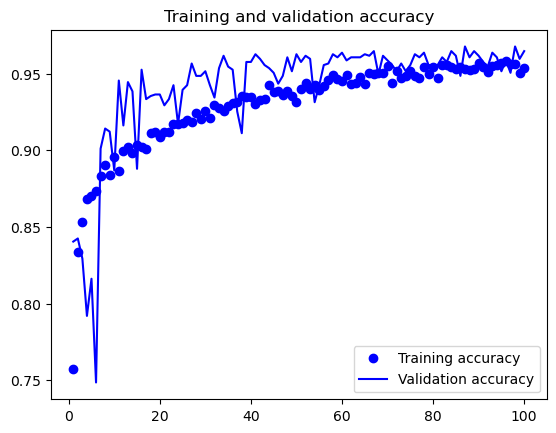

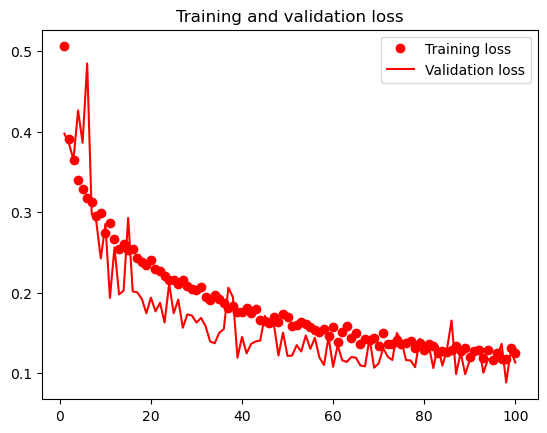

In [3]:
#plotting the validation and training curves
import matplotlib.pyplot as plt

acc = model_training.history['acc']
val_acc = model_training.history['val_acc']
loss = model_training.history['loss']
val_loss = model_training.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()